In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv

In [ ]:
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
dataset = pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')

In [ ]:
dataset

In [ ]:
id	gender	age	hypertension	heart_disease	ever_married	work_type	Residence_type	avg_glucose_level	bmi	smoking_status	stroke
0	9046	Male	67.0	0	1	Yes	Private	Urban	228.69	36.6	formerly smoked	1
1	51676	Female	61.0	0	0	Yes	Self-employed	Rural	202.21	NaN	never smoked	1
2	31112	Male	80.0	0	1	Yes	Private	Rural	105.92	32.5	never smoked	1
3	60182	Female	49.0	0	0	Yes	Private	Urban	171.23	34.4	smokes	1
4	1665	Female	79.0	1	0	Yes	Self-employed	Rural	174.12	24.0	never smoked	1
...	...	...	...	...	...	...	...	...	...	...	...	...
5105	18234	Female	80.0	1	0	Yes	Private	Urban	83.75	NaN	never smoked	0
5106	44873	Female	81.0	0	0	Yes	Self-employed	Urban	125.20	40.0	never smoked	0
5107	19723	Female	35.0	0	0	Yes	Self-employed	Rural	82.99	30.6	never smoked	0
5108	37544	Male	51.0	0	0	Yes	Private	Rural	166.29	25.6	formerly smoked	0
5109	44679	Female	44.0	0	0	Yes	Govt_job	Urban	85.28	26.2	Unknown	0

In [ ]:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB

In [ ]:
dataset.isnull().sum() 

In [ ]:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
dataset.bmi.replace(to_replace=np.nan, value=dataset.bmi.mean(), inplace=True)

In [ ]:
dataset.isnull().sum()

In [ ]:
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
dataset.describe()

In [ ]:
id	age	hypertension	heart_disease	avg_glucose_level	bmi	stroke
count	5110.000000	5110.000000	5110.000000	5110.000000	5110.000000	5110.000000	5110.000000
mean	36517.829354	43.226614	0.097456	0.054012	106.147677	28.893237	0.048728
std	21161.721625	22.612647	0.296607	0.226063	45.283560	7.698018	0.215320
min	67.000000	0.080000	0.000000	0.000000	55.120000	10.300000	0.000000
25%	17741.250000	25.000000	0.000000	0.000000	77.245000	23.800000	0.000000
50%	36932.000000	45.000000	0.000000	0.000000	91.885000	28.400000	0.000000
75%	54682.000000	61.000000	0.000000	0.000000	114.090000	32.800000	0.000000
max	72940.000000	82.000000	1.000000	1.000000	271.740000	97.600000	1.000000

In [ ]:
dataset.corr()

In [ ]:
	id	age	hypertension	heart_disease	avg_glucose_level	bmi	stroke
id	1.000000	0.003538	0.003550	-0.001296	0.001092	0.002999	0.006388
age	0.003538	1.000000	0.276398	0.263796	0.238171	0.325942	0.245257
hypertension	0.003550	0.276398	1.000000	0.108306	0.174474	0.160189	0.127904
heart_disease	-0.001296	0.263796	0.108306	1.000000	0.161857	0.038899	0.134914
avg_glucose_level	0.001092	0.238171	0.174474	0.161857	1.000000	0.168751	0.131945
bmi	0.002999	0.325942	0.160189	0.038899	0.168751	1.000000	0.038947
stroke	0.006388	0.245257	0.127904	0.134914	0.131945	0.038947	1.000000

In [ ]:
# Compute the correlation matrix
corr = dataset.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
<AxesSubplot:>

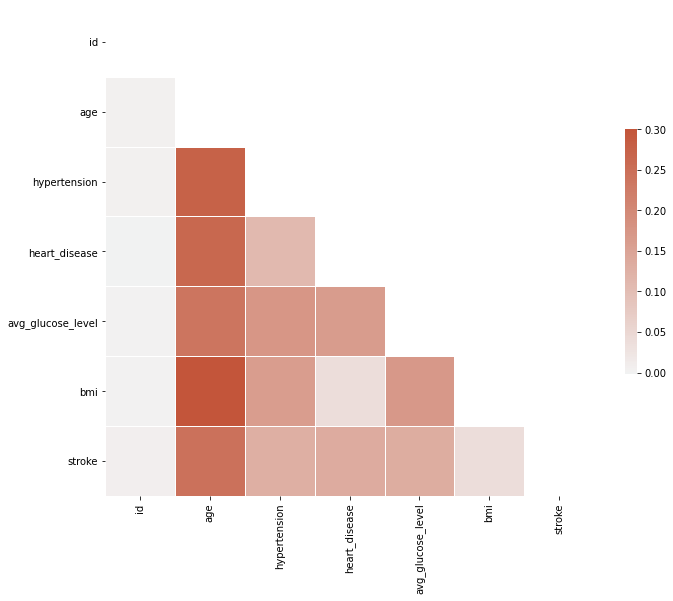

In [ ]:
print(dataset.gender.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="gender")
plt.show()

In [ ]:
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

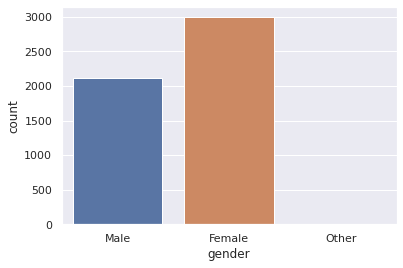

In [ ]:
print(dataset.hypertension.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="hypertension")
plt.show()

In [ ]:
0    4612
1     498
Name: hypertension, dtype: int64

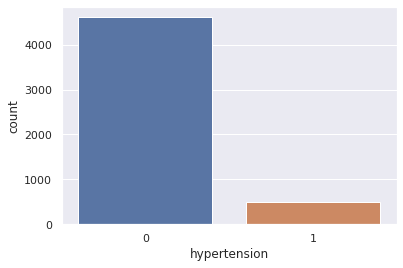

In [ ]:
print(dataset.ever_married.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="ever_married")
plt.show()

In [ ]:
Yes    3353
No     1757
Name: ever_married, dtype: int64

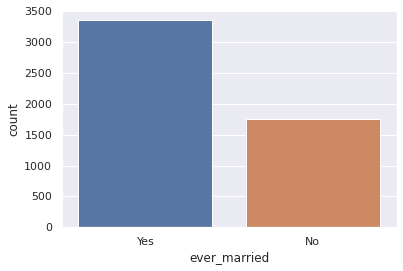

In [ ]:
print(dataset.work_type.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="work_type")
plt.show()

In [ ]:
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

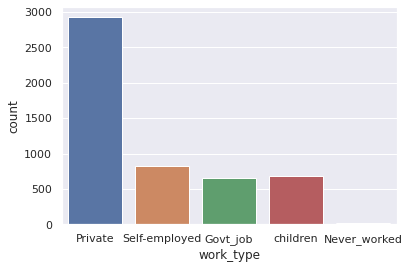

In [ ]:
print(dataset.Residence_type.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="Residence_type")
plt.show()

In [ ]:
Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

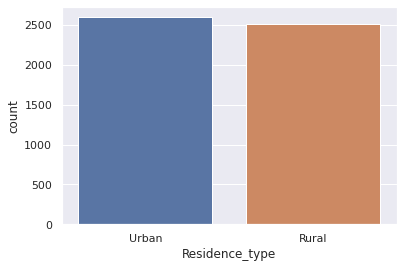

In [ ]:
print(dataset.smoking_status.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="smoking_status")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

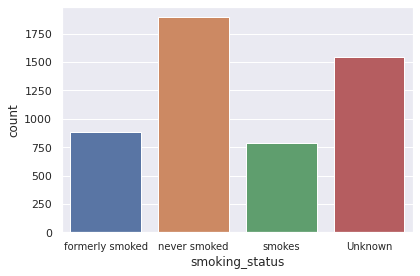

In [ ]:
print(dataset.stroke.value_counts())
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=dataset, x="stroke")
plt.show()

In [ ]:
0    4861
1     249
Name: stroke, dtype: int64

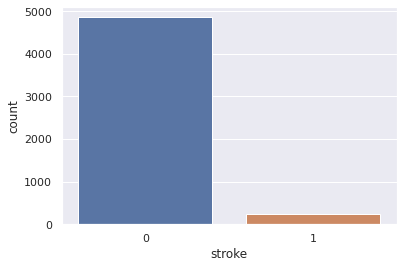

In [ ]:
fig = plt.figure(figsize=(7,7))
sns.distplot(dataset.avg_glucose_level, color="green", label="avg_glucose_level", kde= True)
plt.legend()

In [ ]:
<matplotlib.legend.Legend at 0x7f024dbc2050>

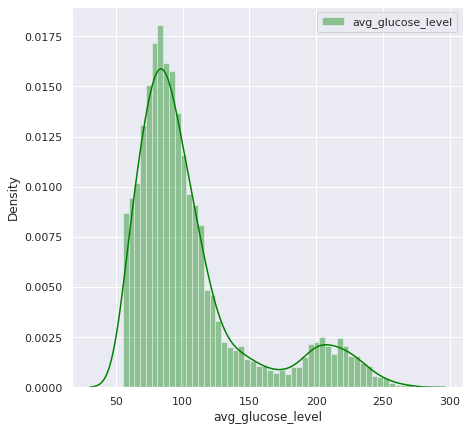

In [ ]:
fig = plt.figure(figsize=(7,7))
sns.distplot(dataset.bmi, color="orange", label="bmi", kde= True)
plt.legend()

In [ ]:
<matplotlib.legend.Legend at 0x7f024dd7b150>

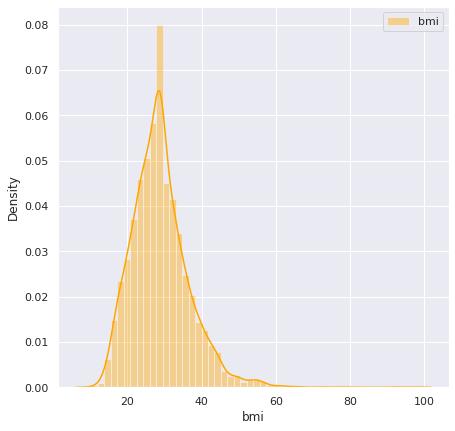

In [ ]:
plt.figure(figsize=(12,10))

sns.distplot(dataset[dataset['stroke'] == 0]["bmi"], color='green') # No Stroke - green
sns.distplot(dataset[dataset['stroke'] == 1]["bmi"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by BMI', fontsize=15)
plt.xlim([10,100])
plt.show()

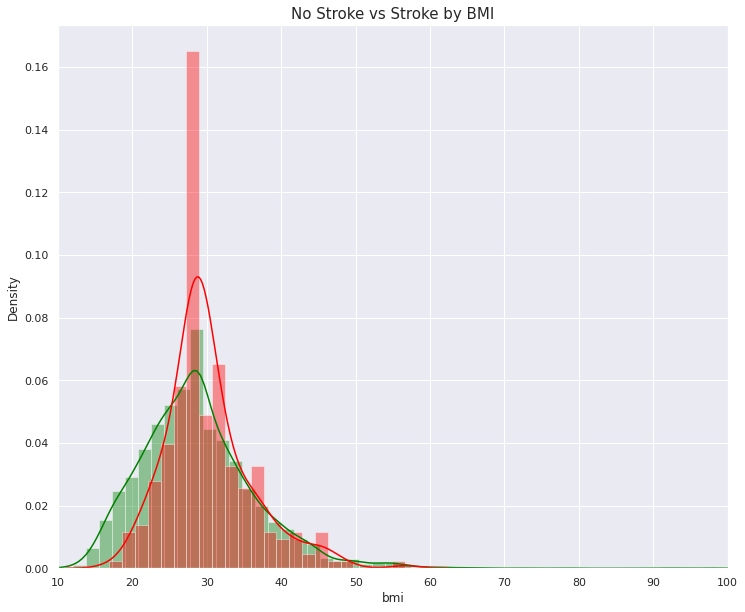

In [ ]:
plt.figure(figsize=(12,10))

sns.distplot(dataset[dataset['stroke'] == 0]["avg_glucose_level"], color='green') # No Stroke - green
sns.distplot(dataset[dataset['stroke'] == 1]["avg_glucose_level"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by Avg. Glucose Level', fontsize=15)
plt.xlim([30,330])
plt.show()

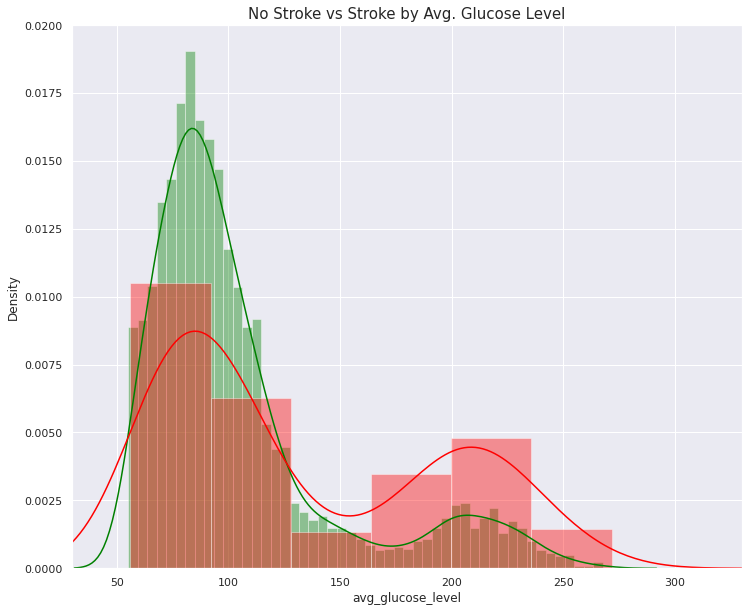

In [ ]:
plt.figure(figsize=(12,10))

sns.distplot(dataset[dataset['stroke'] == 0]["age"], color='green') # No Stroke - green
sns.distplot(dataset[dataset['stroke'] == 1]["age"], color='red') # Stroke - Red

plt.title('No Stroke vs Stroke by Age', fontsize=15)
plt.xlim([18,100])
plt.show()


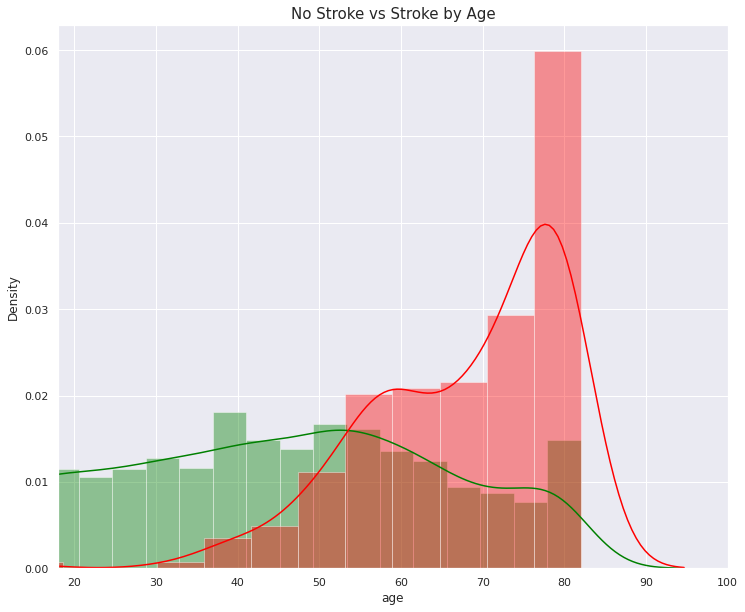

In [ ]:
fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=dataset, x="age", y="bmi", hue='gender')
graph.axhline(y= 25, linewidth=4, color='r', linestyle= '--')
plt.show()

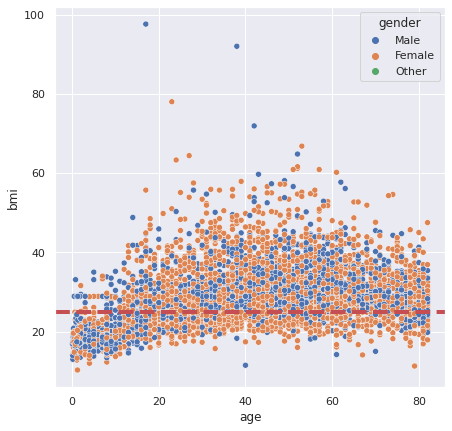

In [ ]:
fig = plt.figure(figsize=(7,7))
graph = sns.scatterplot(data=dataset, x="age", y="avg_glucose_level", hue='gender')
graph.axhline(y= 150, linewidth=4, color='r', linestyle= '--')
plt.show()

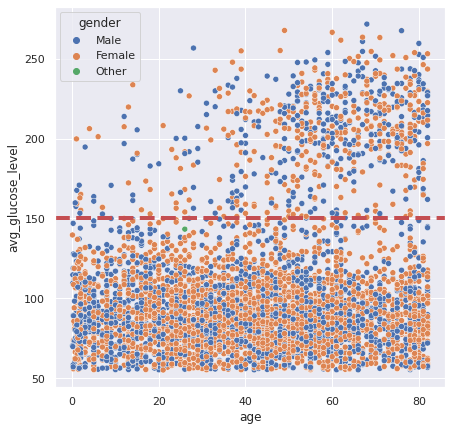